In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

# San Francisco Bike Share

Data Source: https://www.kaggle.com/benhamner/sf-bay-area-bike-share
- The Bay Area Bike Share enables quick, easy, and affordable bike trips around the San Francisco Bay Area. In this project I'm going to try to predict duration of bike trip.

### Content:
- station.csv - Contains data that represents a station where users can pickup or return bikes.

- trips.csv - Data about individual bike trips

- weather.csv - Data about the weather on a specific day for certain zip codes

In [2]:
trip = pd.read_csv(r'D:\datasets\SF Bike Share\trip.csv')
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [3]:
station = pd.read_csv(r'D:\datasets\SF Bike Share\station.csv')
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [4]:
weather = pd.read_csv(r'D:\datasets\SF Bike Share\weather.csv')
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


# Trip Data Exploration

In [5]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  669959 non-null  int64 
 1   duration            669959 non-null  int64 
 2   start_date          669959 non-null  object
 3   start_station_name  669959 non-null  object
 4   start_station_id    669959 non-null  int64 
 5   end_date            669959 non-null  object
 6   end_station_name    669959 non-null  object
 7   end_station_id      669959 non-null  int64 
 8   bike_id             669959 non-null  int64 
 9   subscription_type   669959 non-null  object
 10  zip_code            663340 non-null  object
dtypes: int64(5), object(6)
memory usage: 56.2+ MB


In [6]:
trip.describe().T

,count,mean,std,min,25%,50%,75%,max
id,669959.0,460382.009899,264584.458487,4069.0,231082.5,459274.0,692601.0,913460.0
duration,669959.0,1107.949846,22255.437020,60.0,344.0,517.0,755.0,17270400.0
start_station_id,669959.0,57.851876,17.112474,2.0,50.0,62.0,70.0,84.0
end_station_id,669959.0,57.837438,17.200142,2.0,50.0,62.0,70.0,84.0
bike_id,669959.0,427.587620,153.450988,9.0,334.0,440.0,546.0,878.0


There are some bog outliers. Max duration is 17270400.0 seconds which is 4 797 hours. Let's say we don't want trips longer than 6 hours.

In [7]:
trip = trip[trip['duration']<=21600]
trip.describe().T

,count,mean,std,min,25%,50%,75%,max
id,666872.0,460611.240938,264558.142751,4069.0,231340.75,459718.5,692879.25,913460.0
duration,666872.0,823.218939,1596.638809,60.0,343.00,515.0,751.00,21597.0
start_station_id,666872.0,57.875531,17.094138,2.0,50.00,62.0,70.00,84.0
end_station_id,666872.0,57.854071,17.181443,2.0,50.00,62.0,70.00,84.0
bike_id,666872.0,427.693566,153.323453,9.0,334.00,440.0,546.00,878.0


In [8]:
trip.describe(include=('object')).T

,count,unique,top,freq
start_date,666872,360104,10/28/2014 8:47,16
start_station_name,666872,74,San Francisco Caltrain (Townsend at 4th),48964
end_date,666872,356470,2/20/2015 17:09,16
end_station_name,666872,74,San Francisco Caltrain (Townsend at 4th),63045
subscription_type,666872,2,Subscriber,566235
zip_code,660468,7241,94107,78572


In [9]:
trip['start_date'] = pd.to_datetime(trip['start_date'])
trip['date'] = trip['start_date'].dt.date
trip['date'] = pd.to_datetime(trip['date'])

In [10]:
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,2013-08-29
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,2013-08-29
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,2013-08-29


# Station Data Exploration

In [11]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 70 non-null     int64  
 1   name               70 non-null     object 
 2   lat                70 non-null     float64
 3   long               70 non-null     float64
 4   dock_count         70 non-null     int64  
 5   city               70 non-null     object 
 6   installation_date  70 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ KB


In [12]:
station['dock_count'].describe()

count    70.000000
mean     17.657143
std       4.010442
min      11.000000
25%      15.000000
50%      15.000000
75%      19.000000
max      27.000000
Name: dock_count, dtype: float64

In [13]:
station.describe(include=('object')).T

,count,unique,top,freq
name,70,70,Temporary Transbay Terminal (Howard at Beale),1
city,70,5,San Francisco,35
installation_date,70,17,8/23/2013,7


# Weather Data Exploration

In [14]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            3665 non-null   object 
 1   max_temperature_f               3661 non-null   float64
 2   mean_temperature_f              3661 non-null   float64
 3   min_temperature_f               3661 non-null   float64
 4   max_dew_point_f                 3611 non-null   float64
 5   mean_dew_point_f                3611 non-null   float64
 6   min_dew_point_f                 3611 non-null   float64
 7   max_humidity                    3611 non-null   float64
 8   mean_humidity                   3611 non-null   float64
 9   min_humidity                    3611 non-null   float64
 10  max_sea_level_pressure_inches   3664 non-null   float64
 11  mean_sea_level_pressure_inches  3664 non-null   float64
 12  min_sea_level_pressure_inches   36

In [15]:
# There is one entry per zip code, let's check which has the cleanest data
for zc in weather.zip_code.unique():
    print (weather[weather.zip_code == zc].isnull().sum())
    print()

date                                0
max_temperature_f                   0
mean_temperature_f                  0
min_temperature_f                   0
max_dew_point_f                     0
mean_dew_point_f                    0
min_dew_point_f                     0
max_humidity                        0
mean_humidity                       0
min_humidity                        0
max_sea_level_pressure_inches       0
mean_sea_level_pressure_inches      0
min_sea_level_pressure_inches       0
max_visibility_miles                0
mean_visibility_miles               0
min_visibility_miles                0
max_wind_Speed_mph                  0
mean_wind_speed_mph                 0
max_gust_speed_mph                 13
precipitation_inches                0
cloud_cover                         0
events                            574
wind_dir_degrees                    0
zip_code                            0
dtype: int64

date                                0
max_temperature_f                   

In [16]:
weather.zip_code.unique()

array([94107, 94063, 94301, 94041, 95113], dtype=int64)

In [17]:
# 94107 seems to be the cleanest.
weather = weather[weather.zip_code == 94107]

In [18]:
# Let's clean it up
weather.events.unique()

array([nan, 'Fog', 'Rain', 'Fog-Rain', 'rain', 'Rain-Thunderstorm'],
      dtype=object)

In [19]:
weather.loc[weather['events'] == 'rain', 'events'] = 'Rain'
weather.loc[weather['events'].isnull(), 'events'] = 'Normal'

In [20]:
weather.events.unique()

array(['Normal', 'Fog', 'Rain', 'Fog-Rain', 'Rain-Thunderstorm'],
      dtype=object)

In [21]:
weather.loc[weather.max_gust_speed_mph.isnull(), 'max_gust_speed_mph'] = weather.groupby('max_wind_Speed_mph').max_gust_speed_mph.apply(lambda x: x.fillna(x.median()))

In [22]:
weather.isnull().sum()

date                              0
max_temperature_f                 0
mean_temperature_f                0
min_temperature_f                 0
max_dew_point_f                   0
mean_dew_point_f                  0
min_dew_point_f                   0
max_humidity                      0
mean_humidity                     0
min_humidity                      0
max_sea_level_pressure_inches     0
mean_sea_level_pressure_inches    0
min_sea_level_pressure_inches     0
max_visibility_miles              0
mean_visibility_miles             0
min_visibility_miles              0
max_wind_Speed_mph                0
mean_wind_speed_mph               0
max_gust_speed_mph                0
precipitation_inches              0
cloud_cover                       0
events                            0
wind_dir_degrees                  0
zip_code                          0
dtype: int64

In [23]:
weather['date'] = pd.to_datetime(weather['date'])

Let's merge trip and weather data frames.

In [24]:
df = pd.merge(trip, weather, on = 'date')

In [25]:
df.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code_y
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107


# Data Visualisation

In [26]:
import folium

Unfortunately the folium maps do not seem to render on GitHub natively. To see full dynamic output go to this link: https://nbviewer.jupyter.org/github/k-kwiatkowski/portfolio/blob/master/San%20Francisco%20Bike%20Share.ipynb

In [27]:
bike_map = folium.Map([station['lat'].values[0], station['long'].values[0]])
for s in station['name'].unique():
    lat = station.loc[station['name'] == s]['lat'].values[0]
    long = station.loc[station['name'] == s]['long'].values[0]
    marker = folium.Marker([lat,long], popup=str(s))
    marker.add_to(bike_map)
    
bike_map

Which station is most popular?

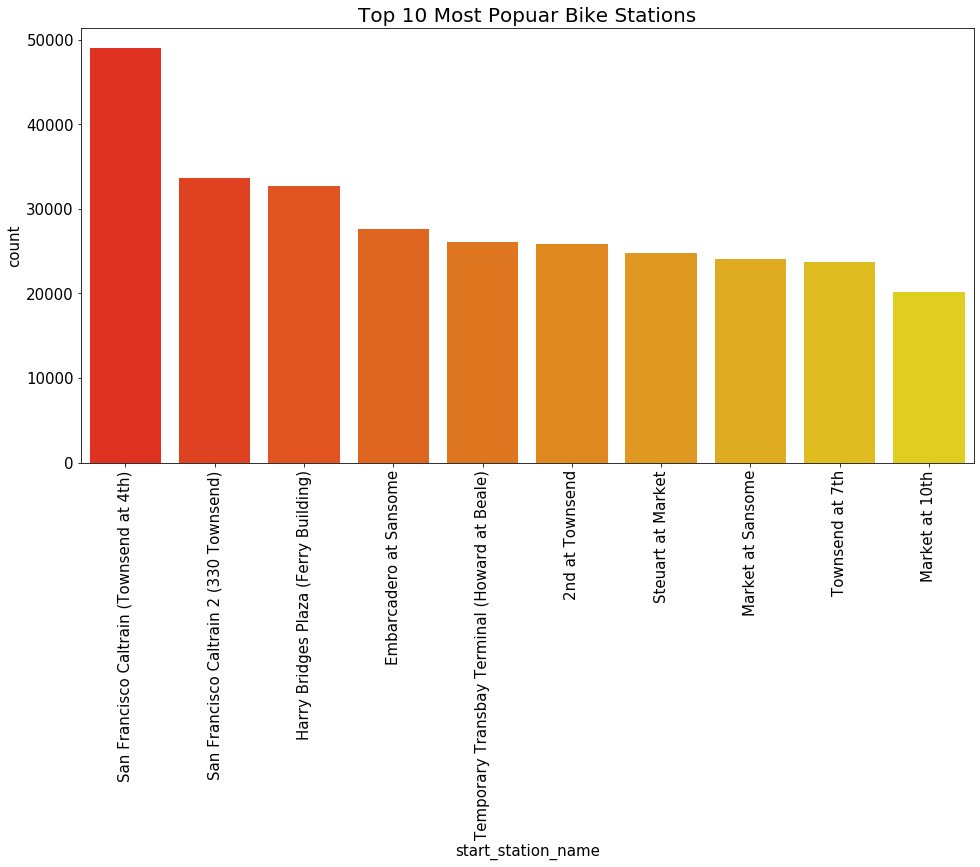

In [86]:
plt.figure(figsize=(16,8))
plt.yticks(fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.ylabel('', fontsize=15)
plt.xlabel('', fontsize=15)
plt.title('Top 10 Most Popuar Bike Stations', fontsize=20)
sns.countplot(x='start_station_name', data=df, 
              order=df['start_station_name'].value_counts().iloc[:10].index, palette='autumn')
plt.show()

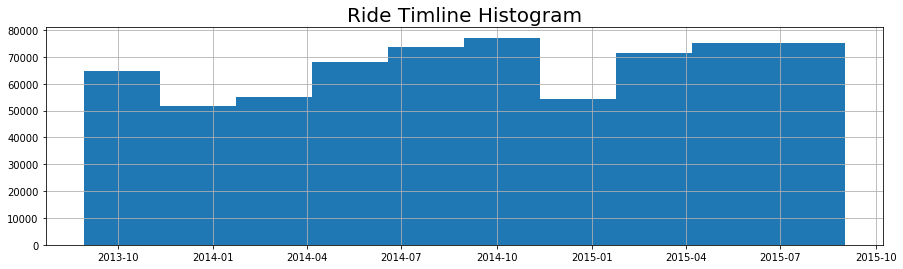

In [29]:
df['start_date'].hist(figsize=(15,4))
plt.title('Ride Timline Histogram', fontsize=20)
plt.show()

We can definietly see some seasonality in ride data. We can see frowth of popularity over summer months till autumn. Ridership declines as it's turns into the winter to its lower point. 

In [30]:
trip['start_month'] = trip['start_date'].dt.month_name()

trip['start_month'].value_counts()

August       64907
July         63456
October      63057
June         61596
May          57762
April        57364
September    56580
March        56003
January      52084
November     49551
February     45257
December     39255
Name: start_month, dtype: int64

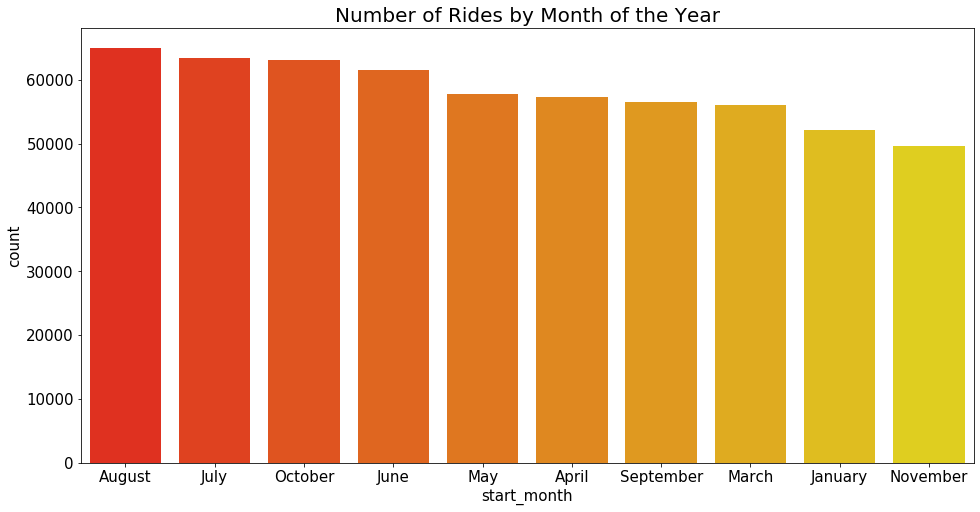

In [31]:
plt.figure(figsize=(16,8))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('', fontsize=15)
plt.xlabel('', fontsize=15)
plt.title('Number of Rides by Month of the Year', fontsize=20)
sns.countplot(x='start_month', data=trip, order=trip['start_month'].value_counts().iloc[:10].index, 
              palette='autumn')
plt.show()

In [32]:
trip['start_day'] = trip['start_date'].dt.day_name()
trip['start_day'].value_counts()

Tuesday      121921
Wednesday    119844
Thursday     118764
Monday       115536
Friday       108890
Saturday      44108
Sunday        37809
Name: start_day, dtype: int64

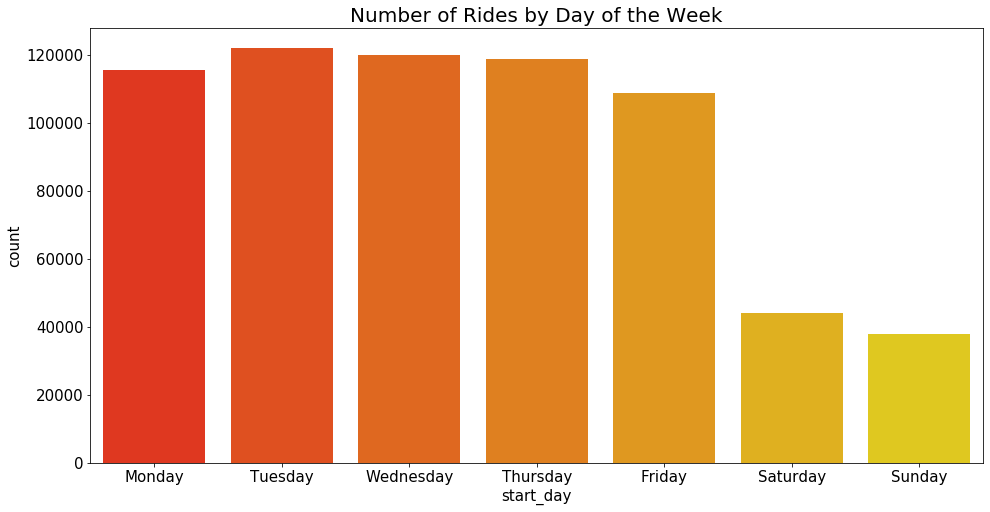

In [33]:
plt.figure(figsize=(16,8))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('', fontsize=15)
plt.xlabel('', fontsize=15)
plt.title('Number of Rides by Day of the Week', fontsize=20)
sns.countplot(x='start_day', data=trip, 
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
              palette='autumn')
plt.show()

Workdays are much more pupular than weekends. It's seems like people use share bikes more to get to the job, school etc. than for recretion puropses.

In [34]:
trip['hours'] = trip['start_date'].dt.round('H')
trip['hours'] = pd.to_datetime(trip['hours'], format= '%H:%M:%S').dt.time
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date,start_month,start_day,hours
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29,August,Thursday,14:00:00
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,2013-08-29,August,Thursday,15:00:00
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29,August,Thursday,10:00:00
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,2013-08-29,August,Thursday,11:00:00
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,2013-08-29,August,Thursday,12:00:00


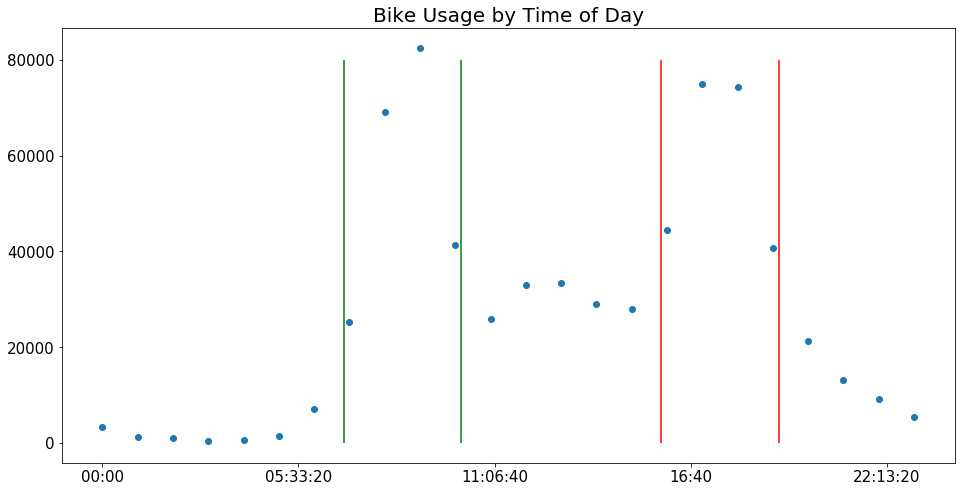

In [35]:
pd.plotting.register_matplotlib_converters()
plt.figure(figsize=(16,8))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('')
plt.title('Bike Usage by Time of Day', fontsize=20)
plt.scatter(trip['hours'].value_counts().index, trip['hours'].value_counts().values)
plt.vlines(x='6:50:00', ymin=0, ymax=80000, color='green')
plt.vlines(x='10:10:00', ymin=0, ymax=80000, color='green')
plt.vlines(x='15:50:00', ymin=0, ymax=80000, color='red')
plt.vlines(x='19:10:00', ymin=0, ymax=80000, color='red')
plt.show()

Now we can clearly see that above chart confirms our theory that share bikes are using to get to and from school, job etc. Probably it's a good alternative for public transport in San Francisco. Bike can be also good alternative to avoid havy traffic in San Francisco.

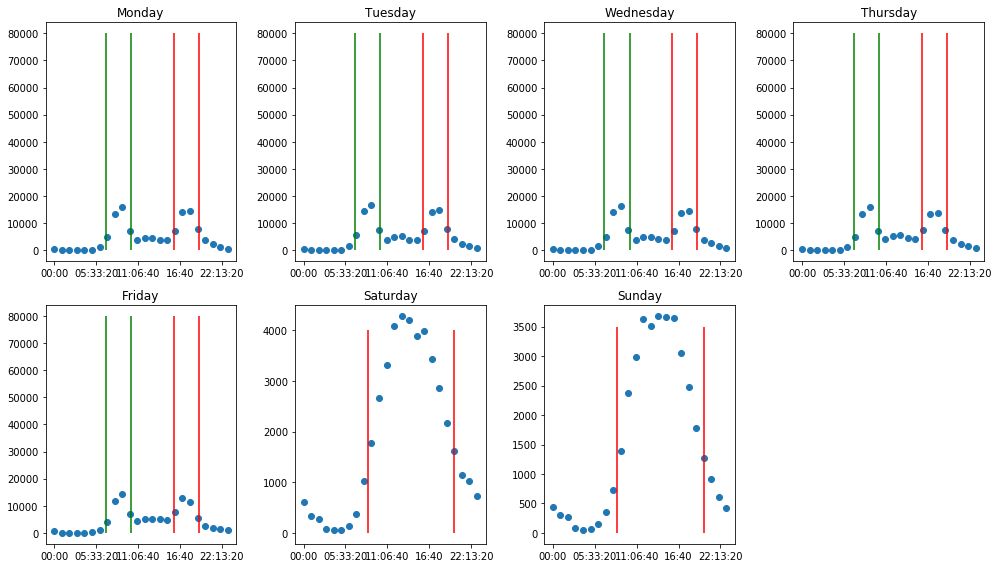

In [36]:
plt.figure(figsize=(14,8))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
for i in range(len(days)):
    plt.subplot(2, 4, i+1)
    plt.scatter(trip.loc[trip['start_day'] == days[i]]['hours'].value_counts().index,
               trip.loc[trip['start_day'] == days[i]]['hours'].value_counts().values)
    plt.title(days[i])
    plt.xlabel('')
    plt.vlines(x='6:50:00', ymin=0, ymax=80000, color='green')
    plt.vlines(x='10:10:00', ymin=0, ymax=80000, color='green')
    plt.vlines(x='15:50:00', ymin=0, ymax=80000, color='red')
    plt.vlines(x='19:10:00', ymin=0, ymax=80000, color='red')

plt.subplot(2,4,6)
plt.scatter(trip.loc[trip['start_day'] == 'Saturday']['hours'].value_counts().index,
           trip.loc[trip['start_day'] == 'Saturday']['hours'].value_counts().values)
plt.title('Saturday')
plt.xlabel('')
plt.vlines(x='8:30:00', ymin=0, ymax=4000, color='red')
plt.vlines(x='20:00:00', ymin=0, ymax=4000, color='red')

plt.subplot(2,4,7)
plt.scatter(trip.loc[trip['start_day'] == 'Sunday']['hours'].value_counts().index,
           trip.loc[trip['start_day'] == 'Sunday']['hours'].value_counts().values)
plt.title('Sunday')
plt.xlabel('')
plt.vlines(x='8:30:00', ymin=0, ymax=3500, color='red')
plt.vlines(x='20:00:00', ymin=0, ymax=3500, color='red')

plt.tight_layout()

We clearly see different distribution during the weekends. Most usage is during midday and afternoon.

In [37]:
trip['subscription_type'].unique()

array(['Subscriber', 'Customer'], dtype=object)

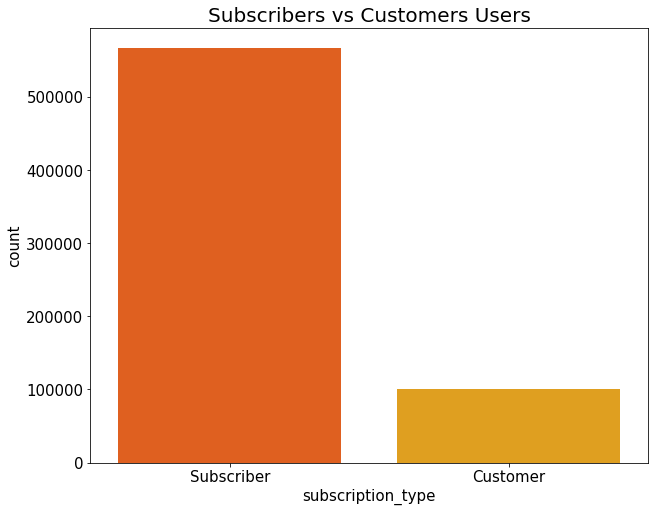

In [38]:
plt.figure(figsize=(10,8))
plt.title('Subscribers vs Customers Users', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('count', fontsize=15)
plt.xlabel('Subsribtion Type', fontsize=15)
sns.countplot(x='subscription_type', data=trip, palette='autumn')
plt.show()

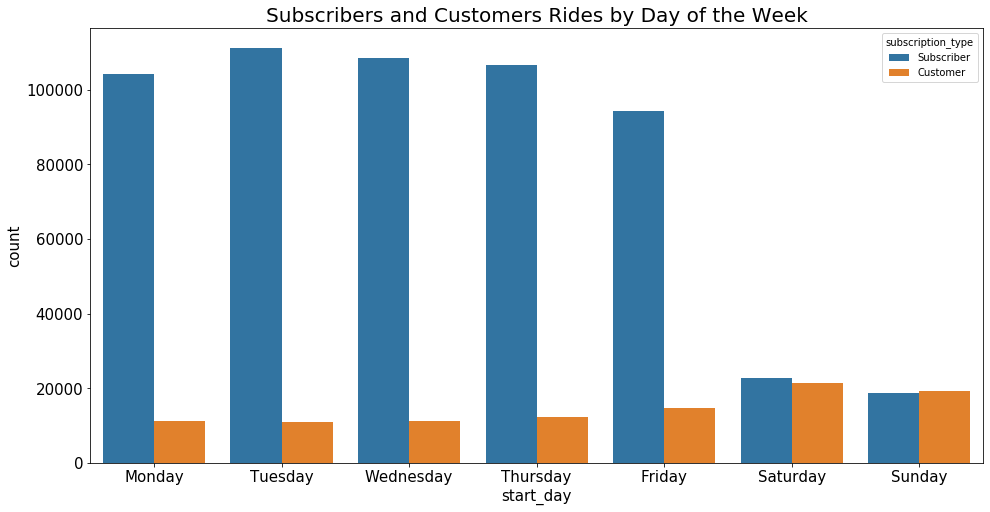

In [39]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('count', fontsize=15)
plt.title('Subscribers and Customers Rides by Day of the Week', fontsize=20)
plt.xlabel('start day', fontsize=15)
sns.countplot(x='start_day', hue='subscription_type', data=trip,
             order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

In the weekdays most of riders are subscribers. In the weeknds number of riders with subscription drops and without subscribtion increase a little bit.

# Preprocessing

In [40]:
pd.set_option('display.max_columns', 100)
df.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code_x,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code_y
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666872 entries, 0 to 666871
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              666872 non-null  int64         
 1   duration                        666872 non-null  int64         
 2   start_date                      666872 non-null  datetime64[ns]
 3   start_station_name              666872 non-null  object        
 4   start_station_id                666872 non-null  int64         
 5   end_date                        666872 non-null  object        
 6   end_station_name                666872 non-null  object        
 7   end_station_id                  666872 non-null  int64         
 8   bike_id                         666872 non-null  int64         
 9   subscription_type               666872 non-null  object        
 10  zip_code_x                      660468 non-null  object 

In [42]:
df['end_date'] = pd.to_datetime(df['end_date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['start_h'] = df['start_date'].dt.hour
df['start_min'] = df['start_date'].dt.minute
df['end_h'] = df['end_date'].dt.hour
df['end_min'] = df['end_date'].dt.minute
df.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code_x,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code_y,day,month,year,start_h,start_min,end_h,end_min
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107,29,8,2013,14,13,14,14
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107,29,8,2013,14,42,14,43
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107,29,8,2013,10,16,10,17
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107,29,8,2013,11,29,11,30
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107,29,8,2013,12,2,12,4


We have to check if there are different days, months or years in start_date and end_date columns. Let's check days first.

In [43]:
dif_d = df[df['start_date'].dt.day != df['end_date'].dt.day]
print('There are', len(dif_d), 'rows.')

There are 835 rows.


There are 835 rows with different days. We need new columns for start_day and end_day. 

In [44]:
df['start_day'] = df['start_date'].dt.day
df['end_day'] = df['end_date'].dt.day
df.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code_x,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code_y,day,month,year,start_h,start_min,end_h,end_min,start_day,end_day
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107,29,8,2013,14,13,14,14,29,29
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107,29,8,2013,14,42,14,43,29,29
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107,29,8,2013,10,16,10,17,29,29
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107,29,8,2013,11,29,11,30,29,29
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107,29,8,2013,12,2,12,4,29,29


Now let's check months.

In [45]:
dif_month = df[df['start_date'].dt.month != df['end_date'].dt.month]
print('There are', len(dif_month), 'rows.')

There are 32 rows.


There are 32 rows where ride starts at one month and ends in different month. Let's make new columns: start_month, end_month.

In [46]:
df['start_month'] = df['start_date'].dt.month
df['end_month'] = df['end_date'].dt.month
df.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code_x,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code_y,day,month,year,start_h,start_min,end_h,end_min,start_day,end_day,start_month,end_month
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107,29,8,2013,14,13,14,14,29,29,8,8
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107,29,8,2013,14,42,14,43,29,29,8,8
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107,29,8,2013,10,16,10,17,29,29,8,8
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107,29,8,2013,11,29,11,30,29,29,8,8
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,94107,29,8,2013,12,2,12,4,29,29,8,8


Now it's time to check if there are different years.

In [47]:
dif_year = df[df['start_date'].dt.year != df['end_date'].dt.year]
print('There are', len(dif_year), 'rows.')

There are 0 rows.


Now we can drop start_date, end_date and date columns. We can also drop start_station_id and end_station_id since we have columns with names. We are going to drop id, bike_id and zip_code columns as well.

In [48]:
df.drop(['start_date', 'end_date', 'date', 'id', 'start_station_id','end_station_id','zip_code_x', 'zip_code_y', 'bike_id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666872 entries, 0 to 666871
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   duration                        666872 non-null  int64  
 1   start_station_name              666872 non-null  object 
 2   end_station_name                666872 non-null  object 
 3   subscription_type               666872 non-null  object 
 4   max_temperature_f               666872 non-null  float64
 5   mean_temperature_f              666872 non-null  float64
 6   min_temperature_f               666872 non-null  float64
 7   max_dew_point_f                 666872 non-null  float64
 8   mean_dew_point_f                666872 non-null  float64
 9   min_dew_point_f                 666872 non-null  float64
 10  max_humidity                    666872 non-null  float64
 11  mean_humidity                   666872 non-null  float64
 12  min_humidity    

Split data frame for data and target.

In [49]:
data = df.copy()
target = data.pop('duration')
data.head()

,start_station_name,end_station_name,subscription_type,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,day,month,year,start_h,start_min,end_h,end_min,start_day,end_day,start_month,end_month
0,South Van Ness at Market,South Van Ness at Market,Subscriber,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,29,8,2013,14,13,14,14,29,29,8,8
1,San Jose City Hall,San Jose City Hall,Subscriber,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,29,8,2013,14,42,14,43,29,29,8,8
2,Mountain View City Hall,Mountain View City Hall,Subscriber,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,29,8,2013,10,16,10,17,29,29,8,8
3,San Jose City Hall,San Jose City Hall,Subscriber,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,29,8,2013,11,29,11,30,29,29,8,8
4,South Van Ness at Market,Market at 10th,Subscriber,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,Normal,286.0,29,8,2013,12,2,12,4,29,29,8,8


In [50]:
target.head()

0    63
1    70
2    71
3    77
4    83
Name: duration, dtype: int64

# Data preprocessing for models

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666872 entries, 0 to 666871
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   start_station_name              666872 non-null  object 
 1   end_station_name                666872 non-null  object 
 2   subscription_type               666872 non-null  object 
 3   max_temperature_f               666872 non-null  float64
 4   mean_temperature_f              666872 non-null  float64
 5   min_temperature_f               666872 non-null  float64
 6   max_dew_point_f                 666872 non-null  float64
 7   mean_dew_point_f                666872 non-null  float64
 8   min_dew_point_f                 666872 non-null  float64
 9   max_humidity                    666872 non-null  float64
 10  mean_humidity                   666872 non-null  float64
 11  min_humidity                    666872 non-null  float64
 12  max_sea_level_pr

In [52]:
cat_cols = [col for col in data.columns if data[col].dtype == 'O']
cat_cols

['start_station_name',
 'end_station_name',
 'subscription_type',
 'precipitation_inches',
 'events']

In [53]:
for col in cat_cols:
    data[col] = data[col].astype('category')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666872 entries, 0 to 666871
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   start_station_name              666872 non-null  category
 1   end_station_name                666872 non-null  category
 2   subscription_type               666872 non-null  category
 3   max_temperature_f               666872 non-null  float64 
 4   mean_temperature_f              666872 non-null  float64 
 5   min_temperature_f               666872 non-null  float64 
 6   max_dew_point_f                 666872 non-null  float64 
 7   mean_dew_point_f                666872 non-null  float64 
 8   min_dew_point_f                 666872 non-null  float64 
 9   max_humidity                    666872 non-null  float64 
 10  mean_humidity                   666872 non-null  float64 
 11  min_humidity                    666872 non-null  float64 
 12  ma

In [54]:
float_cols = [col for col in data.columns if data[col].dtype == 'int64']
float_cols

['day',
 'month',
 'year',
 'start_h',
 'start_min',
 'end_h',
 'end_min',
 'start_day',
 'end_day',
 'start_month',
 'end_month']

In [55]:
for col in float_cols:
    data[col] = data[col].astype('float64')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666872 entries, 0 to 666871
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   start_station_name              666872 non-null  category
 1   end_station_name                666872 non-null  category
 2   subscription_type               666872 non-null  category
 3   max_temperature_f               666872 non-null  float64 
 4   mean_temperature_f              666872 non-null  float64 
 5   min_temperature_f               666872 non-null  float64 
 6   max_dew_point_f                 666872 non-null  float64 
 7   mean_dew_point_f                666872 non-null  float64 
 8   min_dew_point_f                 666872 non-null  float64 
 9   max_humidity                    666872 non-null  float64 
 10  mean_humidity                   666872 non-null  float64 
 11  min_humidity                    666872 non-null  float64 
 12  ma

In [56]:
from sklearn.preprocessing import StandardScaler as scaler

In [57]:
float_cols = [col for col in data.columns if data[col].dtype == 'float64']
data[float_cols] = scaler().fit_transform(data[float_cols])
data.head()

,start_station_name,end_station_name,subscription_type,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,day,month,year,start_h,start_min,end_h,end_min,start_day,end_day,start_month,end_month
0,South Van Ness at Market,South Van Ness at Market,Subscriber,0.681424,1.165306,1.35932,1.544536,1.336232,1.269791,0.906918,0.671084,0.4588,0.026972,0.043016,0.068435,0.072341,0.414554,0.723284,0.747094,0.780746,0.50214,0,0.090108,Normal,0.418523,1.530382,0.465484,-1.774519,0.197757,-0.925973,0.152486,-0.864622,1.530382,1.530399,0.465484,0.465467
1,San Jose City Hall,San Jose City Hall,Subscriber,0.681424,1.165306,1.35932,1.544536,1.336232,1.269791,0.906918,0.671084,0.4588,0.026972,0.043016,0.068435,0.072341,0.414554,0.723284,0.747094,0.780746,0.50214,0,0.090108,Normal,0.418523,1.530382,0.465484,-1.774519,0.197757,0.713221,0.152486,0.783019,1.530382,1.530399,0.465484,0.465467
2,Mountain View City Hall,Mountain View City Hall,Subscriber,0.681424,1.165306,1.35932,1.544536,1.336232,1.269791,0.906918,0.671084,0.4588,0.026972,0.043016,0.068435,0.072341,0.414554,0.723284,0.747094,0.780746,0.50214,0,0.090108,Normal,0.418523,1.530382,0.465484,-1.774519,-0.680695,-0.756401,-0.719967,-0.694176,1.530382,1.530399,0.465484,0.465467
3,San Jose City Hall,San Jose City Hall,Subscriber,0.681424,1.165306,1.35932,1.544536,1.336232,1.269791,0.906918,0.671084,0.4588,0.026972,0.043016,0.068435,0.072341,0.414554,0.723284,0.747094,0.780746,0.50214,0,0.090108,Normal,0.418523,1.530382,0.465484,-1.774519,-0.461082,-0.021590,-0.501854,0.044421,1.530382,1.530399,0.465484,0.465467
4,South Van Ness at Market,Market at 10th,Subscriber,0.681424,1.165306,1.35932,1.544536,1.336232,1.269791,0.906918,0.671084,0.4588,0.026972,0.043016,0.068435,0.072341,0.414554,0.723284,0.747094,0.780746,0.50214,0,0.090108,Normal,0.418523,1.530382,0.465484,-1.774519,-0.241469,-1.547736,-0.283741,-1.432774,1.530382,1.530399,0.465484,0.465467


In [58]:
data = pd.get_dummies(data = data, drop_first=True)
data.head()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,cloud_cover,wind_dir_degrees,day,month,year,start_h,start_min,end_h,end_min,start_day,end_day,start_month,end_month,start_station_name_2nd at South Park,start_station_name_2nd at Townsend,start_station_name_5th at Howard,start_station_name_Adobe on Almaden,start_station_name_Arena Green / SAP Center,start_station_name_Beale at Market,start_station_name_Broadway St at Battery St,start_station_name_Broadway at Main,start_station_name_California Ave Caltrain Station,start_station_name_Castro Street and El Camino Real,start_station_name_Civic Center BART (7th at Market),start_station_name_Clay at Battery,start_station_name_Commercial at Montgomery,start_station_name_Cowper at University,start_station_name_Davis at Jackson,start_station_name_Embarcadero at Bryant,start_station_name_Embarcadero at Folsom,start_station_name_Embarcadero at Sansome,start_station_name_Embarcadero at Vallejo,...,end_station_name_Yerba Buena Center of the Arts (3rd @ Howard),subscription_type_Subscriber,precipitation_inches_0.01,precipitation_inches_0.02,precipitation_inches_0.03,precipitation_inches_0.05,precipitation_inches_0.06,precipitation_inches_0.07,precipitation_inches_0.08,precipitation_inches_0.09,precipitation_inches_0.1,precipitation_inches_0.11,precipitation_inches_0.13,precipitation_inches_0.14,precipitation_inches_0.15,precipitation_inches_0.18,precipitation_inches_0.19,precipitation_inches_0.2,precipitation_inches_0.22,precipitation_inches_0.23,precipitation_inches_0.25,precipitation_inches_0.26,precipitation_inches_0.28,precipitation_inches_0.29,precipitation_inches_0.32,precipitation_inches_0.35,precipitation_inches_0.42,precipitation_inches_0.43,precipitation_inches_0.48,precipitation_inches_0.52,precipitation_inches_0.57,precipitation_inches_0.63,precipitation_inches_0.64,precipitation_inches_0.65,precipitation_inches_0.66,precipitation_inches_0.69,precipitation_inches_0.74,precipitation_inches_0.85,precipitation_inches_0.87,precipitation_inches_0.91,precipitation_inches_0.99,precipitation_inches_1.09,precipitation_inches_1.18,precipitation_inches_1.43,precipitation_inches_3.12,precipitation_inches_T,events_Fog-Rain,events_Normal,events_Rain,events_Rain-Thunderstorm
0,0.681424,1.165306,1.35932,1.544536,1.336232,1.269791,0.906918,0.671084,0.4588,0.026972,0.043016,0.068435,0.072341,0.414554,0.723284,0.747094,0.780746,0.50214,0.090108,0.418523,1.530382,0.465484,-1.774519,0.197757,-0.925973,0.152486,-0.864622,1.530382,1.530399,0.465484,0.465467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.681424,1.165306,1.35932,1.544536,1.336232,1.269791,0.906918,0.671084,0.4588,0.026972,0.043016,0.068435,0.072341,0.414554,0.723284,0.747094,0.780746,0.50214,0.090108,0.418523,1.530382,0.465484,-1.774519,0.197757,0.713221,0.152486,0.783019,1.530382,1.530399,0.465484,0.465467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.681424,1.165306,1.35932,1.544536,1.336232,1.269791,0.906918,0.671084,0.4588,0.026972,0.043016,0.068435,0.072341,0.414554,0.723284,0.747094,0.780746,0.50214,0.090108,0.418523,1.530382,0.465484,-1.774519,-0.680695,-0.756401,-0.719967,-0.694176,1.530382,1.530399,0.465484,0.465467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.681424,1.165306,1.35932,1.544536,1.336232,1.269791,0.906918,0.671084,0.4588,0.026972,0.043016,0.068435,0.072341,0.414554,0.723284,0.747094,0.780746,0.50214,0.090108,0.418523,1.

# Linear Regression

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')

X_train shape (500154, 226)
y_train shape (500154,)
X_test shape (166718, 226)
y_test shape (166718,)


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [62]:
params = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X':[True, False]}
reg = LinearRegression()
grid = GridSearchCV(reg, params, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
grid.score(X_train, y_train)

0.9728361023249438

In [64]:
y_pred = grid.predict(X_test)

In [65]:
grid.score(X_test, y_test)

0.9545134996259206

In [66]:
results = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
results.head()

,y_true,y_pred
355696,489,485.150008
334234,721,710.250907
472694,688,656.772647
618896,208,188.244923
599071,192,184.641864


In [67]:
from sklearn.metrics import mean_absolute_error, max_error, r2_score

In [68]:
mean_absolute_error(y_test, y_pred)

33.70808849612963

In [69]:
max_error(y_test, y_pred)

49821.65027594718

In [70]:
r2_score(y_test, y_pred)

0.9545134996259206

# Decision Tree Regressor

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
X1_train, X1_test, y1_train, y1_test = train_test_split(data, target)

In [75]:
reg1 = DecisionTreeRegressor()
params1 = {'max_depth': np.arange(1,10),
          'min_samples_leaf':[1,2,3,4,5,10,15]}
grid1 = GridSearchCV(reg1, params1, cv=5)
grid1.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [76]:
grid1.best_params_

{'max_depth': 9, 'min_samples_leaf': 5}

In [78]:
grid1.score(X1_train, y1_train)

0.8454404205194274

In [80]:
y1_pred = grid1.predict(X1_test)

In [81]:
grid1.score(X1_test, y1_test)

0.8537396386508954

In [82]:
results1 = pd.DataFrame({'y1_true': y1_test, 'y1_pred': y1_pred})
results1.head()

,y1_true,y1_pred
457077,506,640.628924
101092,883,487.500061
226529,730,609.289919
514856,583,1648.825350
441631,487,487.500061


In [83]:
mean_absolute_error(y1_test, y1_pred)

270.54162345652264

In [84]:
max_error(y1_test, y1_pred)

20713.499938734407

In [85]:
r2_score(y1_test, y1_pred)

0.8537396386508954

Linear Regression model works much better, it's have better r2_score and better mean_absolute_error. However Decision Tree Regressor have lower max_error.